In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import corrcoef as corr
import seaborn as sns

Ссылки на данные:

Libor3M USD https://fred.stlouisfed.org/series/USD3MTD156N

Mosprime3M RUB http://mosprime.com/archive?date_from=2020-12-19&date_to=2021-12-19&contributor=

In [2]:
df_libor = pd.read_excel('libor3mUSD.xlsx', header = None, names=['data', 'value'])
df_libor.head()

,data,value
0,2016-12-12,0.95872
1,2016-12-13,0.96344
2,2016-12-14,0.97039
3,2016-12-15,0.99317
4,2016-12-16,0.99733


In [3]:
df_mosprime = pd.read_excel('mosprimeRUB.xlsx', header = None, names=['data', 'value'])
df_mosprime = df_mosprime.iloc[::-1].reset_index()
df_mosprime.drop(columns='index', inplace=True)
df_mosprime.head()

,data,value
0,2020-12-21,4.92
1,2020-12-22,4.94
2,2020-12-23,4.93
3,2020-12-24,4.92
4,2020-12-25,4.93


In [4]:
df_libor[(df_libor['data']>'2020-12-20') & (df_libor['data']<'2021-12-17')]

,data,value
1050,2020-12-21,0.24488
1051,2020-12-22,0.23813
1052,2020-12-23,0.25100
1053,2020-12-24,0.24013
1054,2020-12-25,0.00000
...,...,...
1300,2021-12-06,0.19000
1301,2021-12-07,0.19825
1302,2021-12-08,0.20050
1303,2021-12-09,0.20088


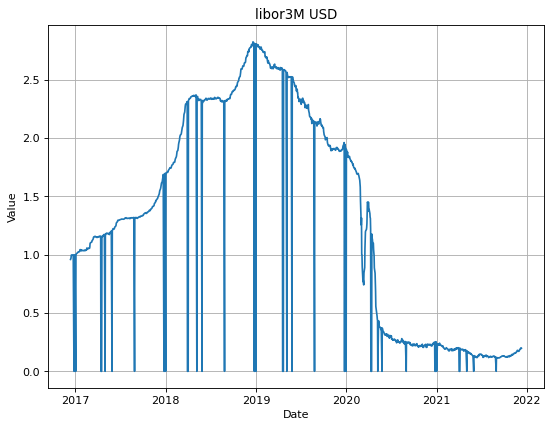

In [5]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.plot(df_libor['data'], df_libor['value'])
plt.title('libor3M USD')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()

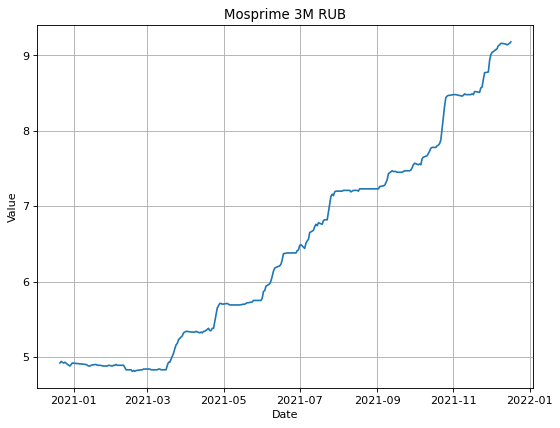

In [6]:
figure(figsize=(8, 6), dpi=80)

plt.plot(df_mosprime['data'], df_mosprime['value'])
plt.title('Mosprime 3M RUB')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()

In [7]:
merged_df = pd.merge(df_mosprime, df_libor, on='data')
merged_df.rename(columns={'value_x': 'mosprime', 'value_y': 'libor'}, inplace=True)
merged_df

,data,mosprime,libor
0,2020-12-21,4.92,0.24488
1,2020-12-22,4.94,0.23813
2,2020-12-23,4.93,0.25100
3,2020-12-24,4.92,0.24013
4,2020-12-25,4.93,0.00000
...,...,...,...
236,2021-12-06,9.09,0.19000
237,2021-12-07,9.13,0.19825
238,2021-12-08,9.14,0.20050
239,2021-12-09,9.16,0.20088


In [9]:
rub_usd_df = pd.read_csv('USDCB_201221_211210.csv')
rub_usd_df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,USDCB,60,20201222,10000,74.6721,74.6721,74.6721,74.6721,0
1,USDCB,60,20201223,10000,75.3498,75.3498,75.3498,75.3498,0
2,USDCB,60,20201224,10000,75.4571,75.4571,75.4571,75.4571,0
3,USDCB,60,20201225,10000,74.8392,74.8392,74.8392,74.8392,0
4,USDCB,60,20201226,10000,73.6921,73.6921,73.6921,73.6921,0


In [11]:
rub_usd_df['<DATE>'] = pd.to_datetime(rub_usd_df['<DATE>'], format='%Y%m%d')
rub_usd_df.drop(columns=['<TICKER>', '<PER>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<VOL>'], inplace=True)
rub_usd_df.rename(columns={'<DATE>': 'data', '<CLOSE>': 'value'}, inplace=True)
rub_usd_df.drop(rub_usd_df.tail(1).index,inplace=True)

In [12]:
rub_usd_df

,data,value
0,2020-12-22,74.6721
1,2020-12-23,75.3498
2,2020-12-24,75.4571
3,2020-12-25,74.8392
4,2020-12-26,73.6921
...,...,...
236,2021-12-04,73.7426
237,2021-12-07,73.6694
238,2021-12-08,74.1399
239,2021-12-09,73.8453


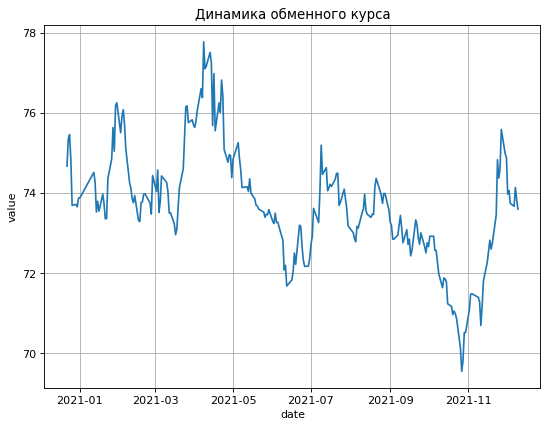

In [13]:
figure(figsize=(8, 6), dpi=80)

plt.plot(rub_usd_df['data'], rub_usd_df['value'])
plt.title('Динамика обменного курса')
plt.xlabel('date')
plt.ylabel('value')
plt.grid()

In [24]:
temp_df=pd.DataFrame()
temp_df['mosprime'] = merged_df['mosprime']
temp_df['libor'] = merged_df['libor']
# Будем считать приросты логарифмов для обменного курса
# так как в модели приросты выражаются через деление прошлого значения
temp_df['rub_usd'] = np.log(rub_usd_df['value'])  

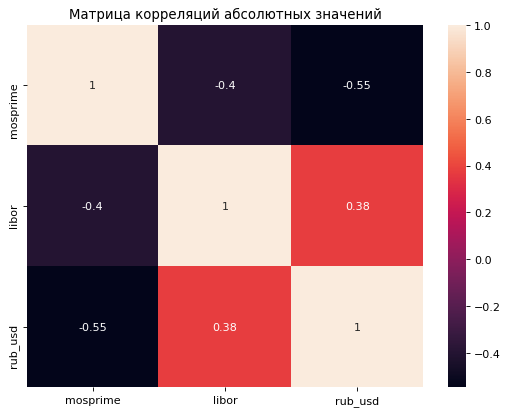

In [25]:
figure(figsize=(8, 6), dpi=80)

plt.title('Матрица корреляций абсолютных значений')
sns.heatmap(temp_df.corr(), annot=True)
plt.show()

In [26]:
diff_df = temp_df.diff(1)[1:]

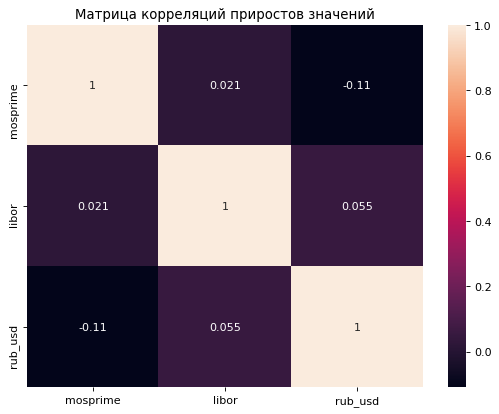

In [28]:
figure(figsize=(8, 6), dpi=80)

plt.title('Матрица корреляций приростов значений')
sns.heatmap(diff_df.corr(), annot=True)
plt.show()

In [29]:
rub_usd_df['value']

0      74.6721
1      75.3498
2      75.4571
3      74.8392
4      73.6921
        ...   
236    73.7426
237    73.6694
238    74.1399
239    73.8453
240    73.5998
Name: value, Length: 241, dtype: float64